In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [11]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [12]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
mi_rr=matches[((matches.team1=='Mumbai Indians') | (matches.team2=='Mumbai Indians')) & ((matches.team1=='Rajasthan Royals') | (matches.team2=='Rajasthan Royals'))]
mi=matches[(matches.team1=='Mumbai Indians') | (matches.team2=='Mumbai Indians')]
rr=matches[(matches.team1=='Rajasthan Royals') | (matches.team2=='Rajasthan Royals')]
mi_rr.shape,mi.shape,rr.shape

((20, 18), (187, 18), (147, 18))

In [14]:
mi_rrdeli=deliveries[((deliveries.batting_team=='Mumbai Indians') | (deliveries.bowling_team=='Mumbai Indians')) & ((deliveries.batting_team=='Rajasthan Royals') | (deliveries.bowling_team=='Rajasthan Royals'))]
mideli=deliveries[(deliveries.batting_team=='Mumbai Indians') | (deliveries.bowling_team=='Mumbai Indians')]
rrdeli=deliveries[(deliveries.batting_team=='Rajasthan Royals') | (deliveries.bowling_team=='Rajasthan Royals')]
mi_rrdeli.shape,mideli.shape,rrdeli.shape

((4803, 21), (45136, 21), (34674, 21))

# Q1

In [19]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='Darkblue')
        ax[i].set_title(columns[i])

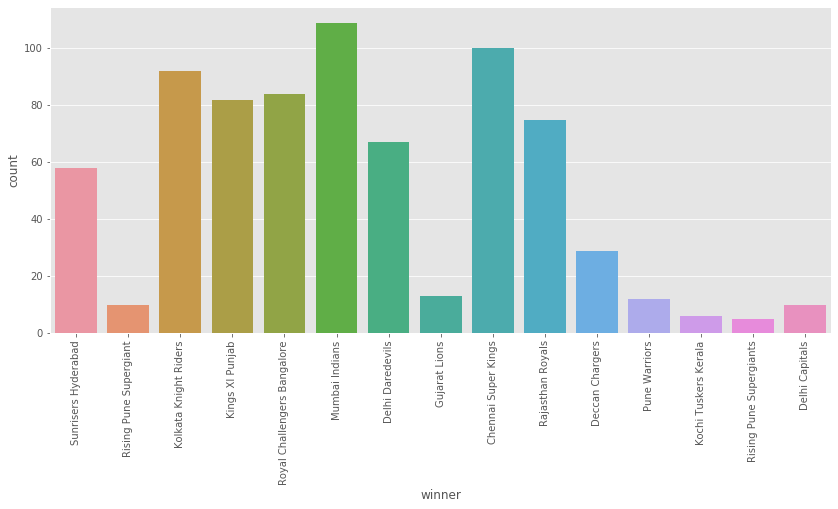

In [46]:
plt.figure(figsize=(14,6))
for i in sns.countplot(matches.winner).get_xticklabels():
    i.set_rotation(90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

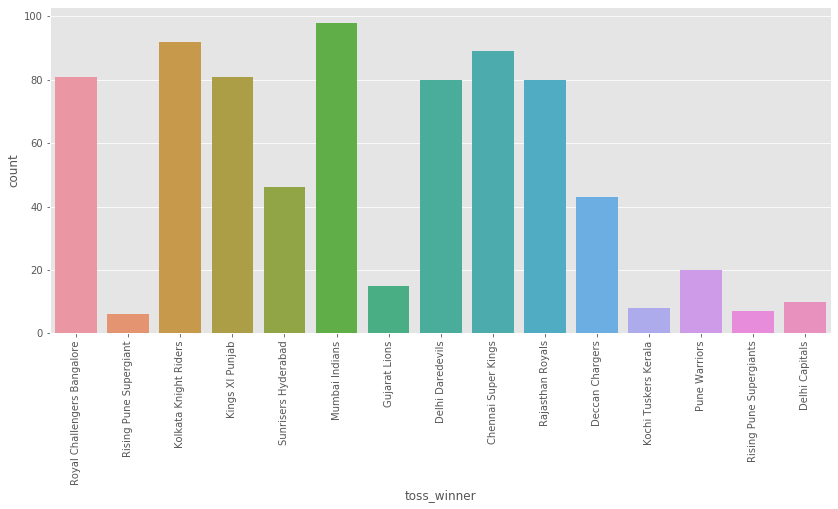

In [42]:
plt.figure(figsize=(14,6))
sns.countplot(matches.toss_winner)
plt.xticks(rotation=90)

In [29]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],autopct='%2.f%%',colors=['lightyellow','lightgreen'])
        ax[i].set_title(columns[i])

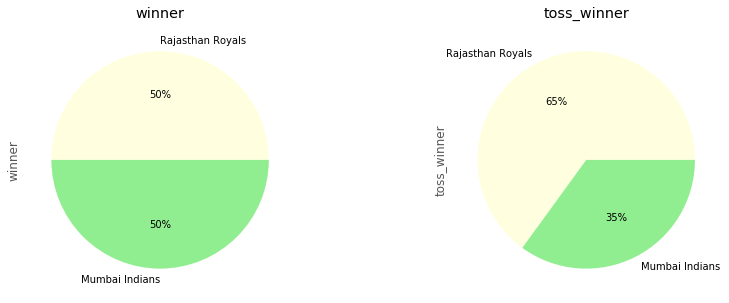

In [30]:
cat_plot(mi_rr,['winner','toss_winner'],(14,5),'pie')


### As we can see there is 50-50 chance for both the teams to win the match so the next feasible option will be determined by looking at the toss_winner percentage and although MI wins toss more than any other team if overall data is considered yet it somehow loses most of the tosses when playing with RR.

# Q2

In [123]:
run_sum=mi_rrdeli.pivot_table(index=['match_id','batsman'],aggfunc=['sum','count'],values=['batsman_runs','ball'])
run_sum=run_sum[run_sum["count","ball"]>=10]
no_of_balls=run_sum['count','ball']
run_sum=run_sum['sum','batsman_runs']
run_sum

match_id  batsman      
86        AM Nayar         12
          RV Uthappa       34
          SA Asnodkar      39
          SR Watson        32
          ST Jayasuriya    18
                           ..
11327     HH Pandya        25
          Q de Kock        67
          R Parag          44
          SPD Smith        59
          SV Samson        39
Name: (sum, batsman_runs), Length: 162, dtype: int64

In [124]:
no_of_balls

match_id  batsman      
86        AM Nayar         14
          RV Uthappa       24
          SA Asnodkar      38
          SR Watson        22
          ST Jayasuriya    20
                           ..
11327     HH Pandya        17
          Q de Kock        49
          R Parag          29
          SPD Smith        48
          SV Samson        19
Name: (count, ball), Length: 162, dtype: int64

In [108]:
no_boundary_runs=mi_rrdeli.pivot_table(index=['match_id','batsman','over','ball'],aggfunc=['sum','count'],values='batsman_runs')
no_boundary_runs=no_boundary_runs[no_boundary_runs['sum','batsman_runs']>=4]
no_boundary_runs=no_boundary_runs['count','batsman_runs']
no_boundary_runs=no_boundary_runs.groupby(['match_id','batsman']).sum()
no_boundary_runs

match_id  batsman    
86        AM Nayar       1
          RV Uthappa     5
          SA Asnodkar    4
          SK Warne       1
          SR Watson      5
                        ..
11327     R Parag        6
          RG Sharma      1
          SPD Smith      6
          STR Binny      1
          SV Samson      8
Name: (count, batsman_runs), Length: 206, dtype: int64

In [121]:
_123=mi_rrdeli.groupby(['match_id','over','batsman','ball']).sum()
_123=_123.query('batsman_runs==1 | batsman_runs==2 | batsman_runs==3')
# _123.batsman_runs.unique()
_123=_123.groupby(['match_id','batsman',]).count().batsman_runs
_123

match_id  batsman  
86        AM Nayar      7
          DJ Bravo      1
          GC Smith      4
          M Kaif        3
          M Rawat       1
                       ..
11327     R Parag      15
          RG Sharma     1
          SPD Smith    28
          STR Binny     3
          SV Samson     5
Name: batsman_runs, Length: 260, dtype: int64

Text(0.5, 1.0, 'Batsman Intimidation Score of top 70 players ("Averages")')

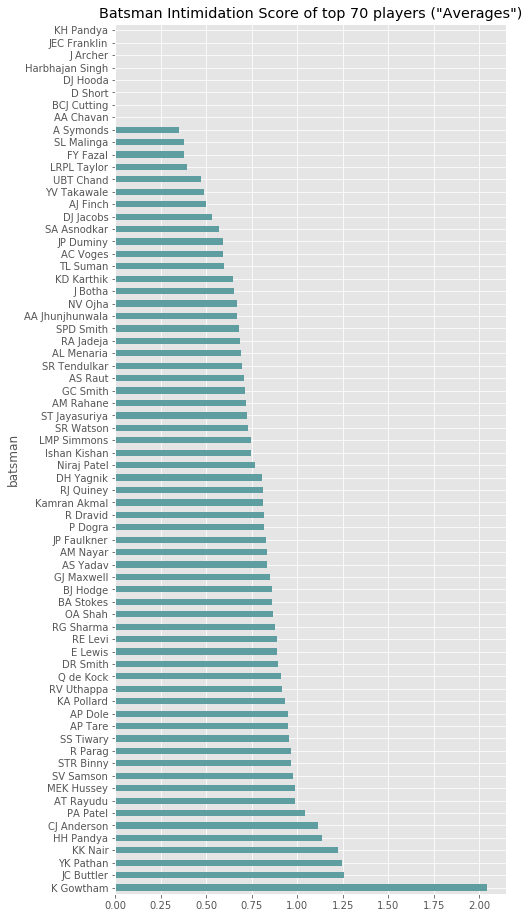

In [163]:
def BIS():
    return ((run_sum+no_boundary_runs-(_123)*0.5)/no_of_balls).groupby('batsman').mean()

BIS().sort_values(ascending=False).iloc[0:70].plot.barh(figsize=(7,16),color='Cadetblue')
plt.title('Batsman Intimidation Score of top 70 players ("Averages")')


### As there is clear disparity between K Gowtham's(1st Position) BIS when compared to others and after little bit of manually searc it becomes evident that he is kxip team player and that team is not playing today now if we consider the 2nd highest which is JC Buttler we can search it up and find out that he is playing for RR which is one the teams who are playing today so we can consider him as the answer.As the top 5-7 options are not available in the question we can choose others

# Q3
- BOTH OF THE VARIABLES (no_boundary_runs,run_sum)USED HERE ARE ALREADY CALCULATED IN Q2

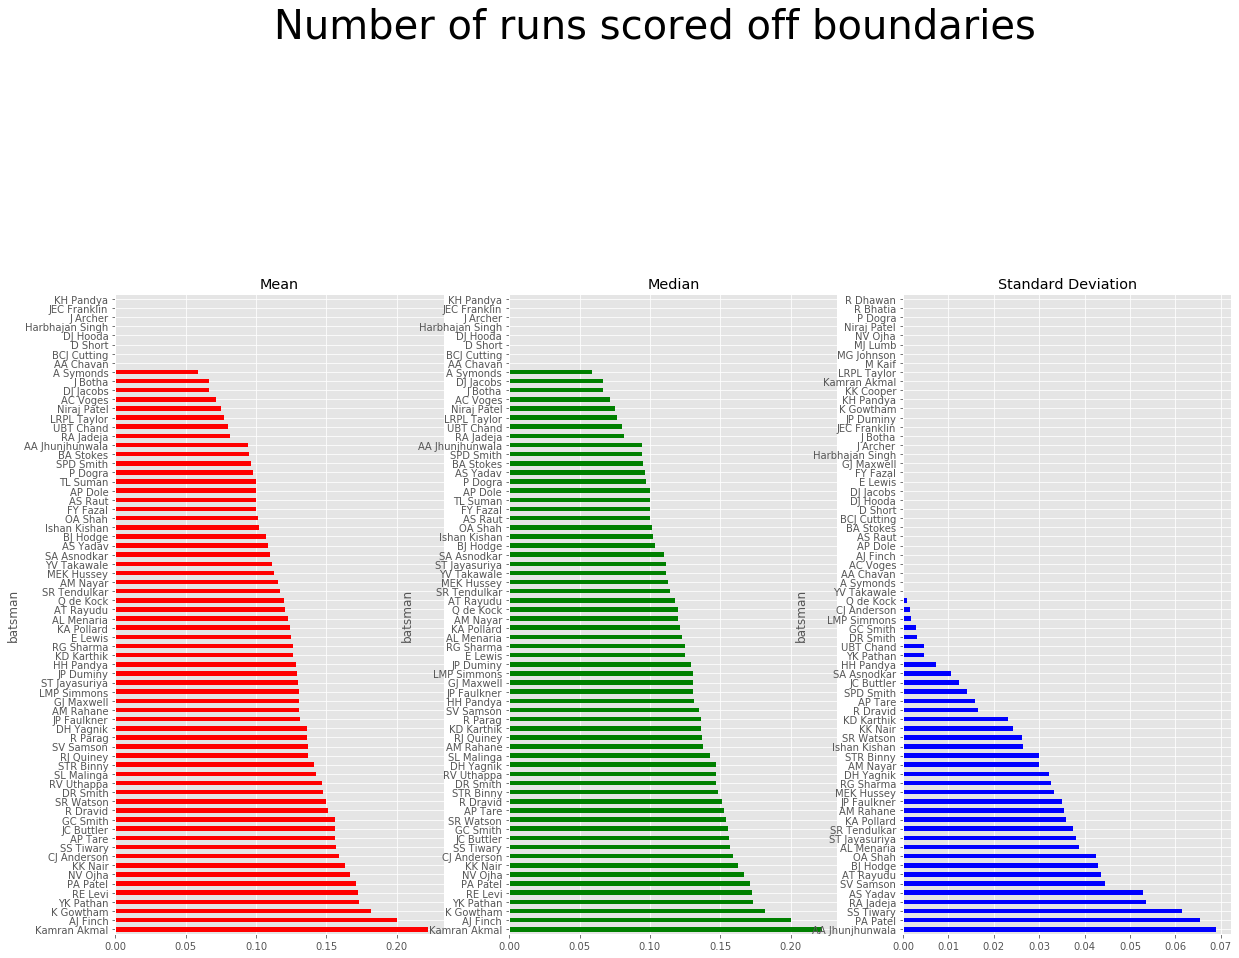

In [360]:
bat_ratio=(no_boundary_runs/run_sum).groupby('batsman')
fig=plt.figure(figsize=(20,40))
fig.suptitle('Number of runs scored off boundaries',fontsize=40)
fig.add_subplot(331)
bat_ratio.mean().sort_values(ascending=False).iloc[0:70].plot.barh(color='r',title='Mean')
fig.add_subplot(332)
bat_ratio.median().sort_values(ascending=False).iloc[0:70].plot.barh(color='g',title='Median')
fig.add_subplot(333)
bat_ratio.std().sort_values(ascending=False).iloc[0:70].plot.barh(color='b',title='Standard Deviation')                                                                                                        

### As the top 5-7 options are not available in the question we can choose others

# Q4
-First we need to calculate how many balls does MI need to score 100 runs

In [216]:
mideli.pivot_table(index=['match_id','over',],values=['total_runs','ball'],aggfunc=['sum','count'])

sum            count           
              ball total_runs  ball total_runs
match_id over                                 
2        1      56         19    14         14
         2      42         23    12         12
         3      42         21    12         12
         4      42         17    12         12
         5      42         11    12         12
...            ...        ...   ...        ...
11415    16     42         28    12         12
         17     42         15    12         12
         18     42         36    12         12
         19     42         17    12         12
         20     42         16    12         12

[3726 rows x 4 columns]

In [260]:
ju=0
mi_100=mideli.pivot_table(index=['match_id','over','ball'],values=['total_runs'],aggfunc='sum').total_runs
balls=[]
for _ in range(len(mi_100)):
    _+=mi_100.iloc[_]
    balls.append(mi_100.iloc[_])
    if _>=100 and _<=110:
        break
print(_)
sum(balls)


103


240

# Q5

In [284]:
no_of_wickets=mi_rrdeli.groupby(['match_id','bowler']).player_dismissed.count()
no_of_wickets

match_id  bowler     
86        A Nehra        3
          DJ Bravo       2
          DS Kulkarni    2
          MM Patel       0
          RR Raje        2
                        ..
11327     R Parag        0
          RD Chahar      3
          S Gopal        2
          SL Malinga     0
          STR Binny      1
Name: player_dismissed, Length: 241, dtype: int64

In [285]:
no_dot_balls=mi_rrdeli.query('batsman_runs==0').groupby(['match_id','bowler']).batsman_runs.count()
no_dot_balls 

match_id  bowler     
86        A Nehra        12
          DJ Bravo       12
          DS Kulkarni    10
          MM Patel       10
          RR Raje         7
                         ..
11327     R Parag         2
          RD Chahar      10
          S Gopal         8
          SL Malinga      4
          STR Binny       8
Name: batsman_runs, Length: 238, dtype: int64

In [293]:
no_of_boundary_given=mi_rrdeli.pivot_table(index=['match_id','bowler','over','ball'],aggfunc=['sum','count'],values='batsman_runs')
no_of_boundary_given=no_of_boundary_given[no_of_boundary_given['sum','batsman_runs']>=4]
no_of_boundary_given=no_of_boundary_given['count','batsman_runs']
no_of_boundary_given=no_of_boundary_given.groupby(['match_id','bowler']).sum()
no_of_boundary_given



match_id  bowler     
86        A Nehra        2
          DS Kulkarni    3
          MM Patel       2
          RR Raje        2
          SK Trivedi     3
                        ..
11327     R Parag        1
          RD Chahar      4
          S Gopal        1
          SL Malinga     5
          STR Binny      2
Name: (count, batsman_runs), Length: 226, dtype: int64

In [315]:
sum_boundary_runs=mi_rrdeli.pivot_table(index=['match_id','bowler','over','ball'],aggfunc=['sum','count'],values='batsman_runs')
sum_boundary_runs=sum_boundary_runs[sum_boundary_runs['sum','batsman_runs']>=4]
sum_boundary_runs=sum_boundary_runs['sum','batsman_runs']
sum_boundary_runs=sum_boundary_runs.groupby(['match_id','bowler']).sum()
sum_boundary_runs

match_id  bowler     
86        A Nehra         8
          DS Kulkarni    16
          MM Patel       11
          RR Raje         8
          SK Trivedi     16
                         ..
11327     R Parag         6
          RD Chahar      18
          S Gopal         4
          SL Malinga     20
          STR Binny       8
Name: (sum, batsman_runs), Length: 226, dtype: int64

In [337]:
#Here the values parameter being batsman_runs is of no concern to us because we are counting the number of balls
#so it can be any column
total_bowled=mi_rrdeli.pivot_table(index=['match_id','bowler','over','ball'],aggfunc=['sum','count'],values='batsman_runs')
total_bowled=total_bowled['count','batsman_runs'].groupby(['match_id','bowler']).sum()
total_bowled

match_id  bowler     
86        A Nehra        18
          DJ Bravo       18
          DS Kulkarni    18
          MM Patel       19
          RR Raje        19
                         ..
11327     R Parag        12
          RD Chahar      24
          S Gopal        24
          SL Malinga     19
          STR Binny      19
Name: (count, batsman_runs), Length: 241, dtype: int64

In [344]:
def BLS():
    return ((no_of_wickets+no_dot_balls*2-(sum_boundary_runs/no_of_boundary_given))/(total_bowled-no_dot_balls*2.5))
BLS()

match_id  bowler     
86        A Nehra        -1.916667
          DJ Bravo             NaN
          DS Kulkarni    -2.380952
          MM Patel       -2.416667
          RR Raje         8.000000
                           ...    
11327     R Parag        -0.285714
          RD Chahar     -18.500000
          S Gopal         3.500000
          SL Malinga      0.444444
          STR Binny     -13.000000
Length: 241, dtype: float64

Text(0.5, 0.98, 'Bowler Lethality Score of top 50 Bowlers')

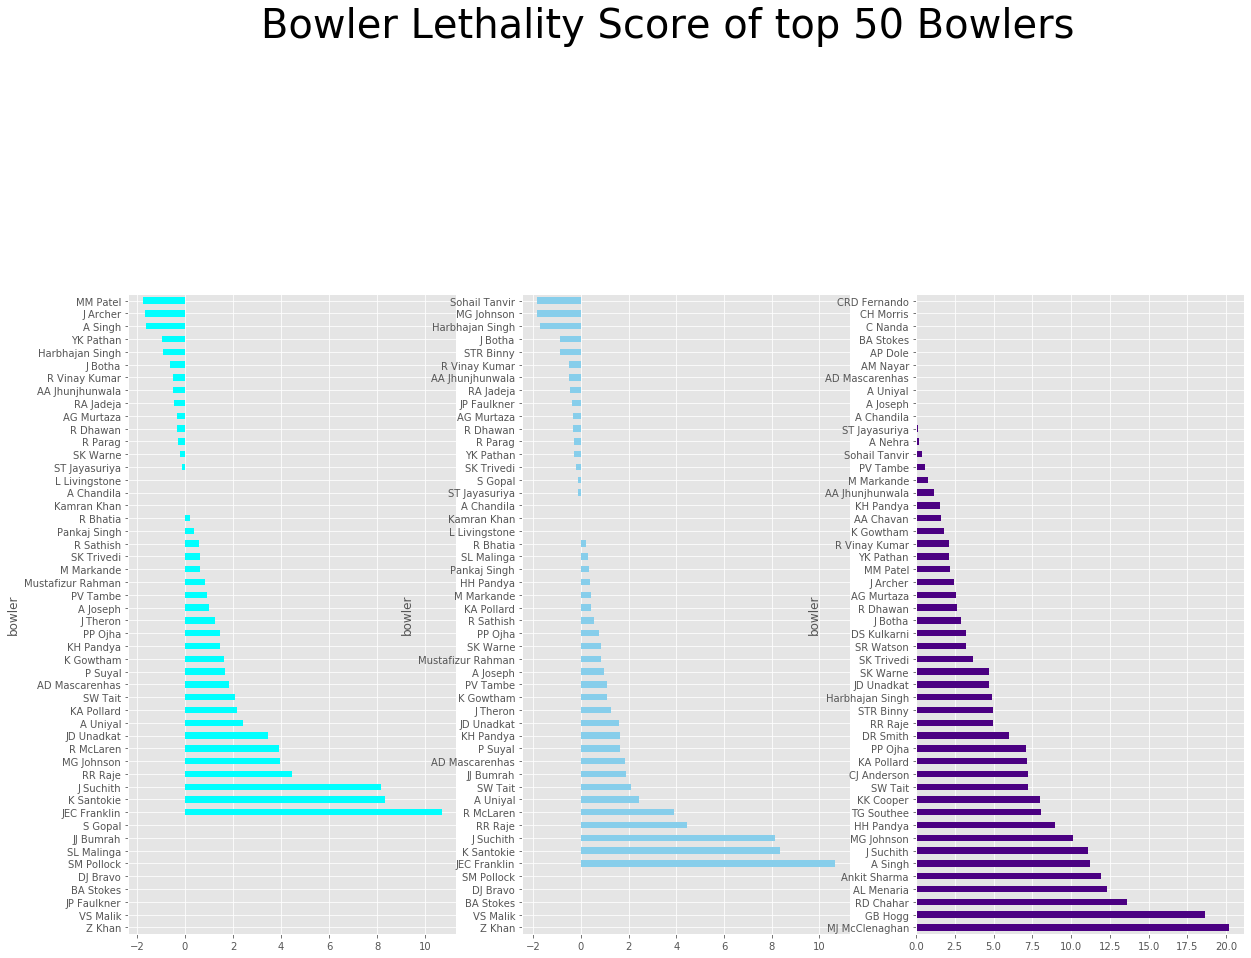

In [359]:
bls=BLS().groupby('bowler')
fig=plt.figure(figsize=(20,40))
fig.add_subplot(331)
bls.mean().sort_values(ascending=False).iloc[0:50].plot.barh(color='Aqua',title='Mean')
fig.add_subplot(332)
bls.median().sort_values(ascending=False).iloc[0:50].plot.barh(color='skyblue',title='Median')
fig.add_subplot(333)
bls.std().sort_values(ascending=False).iloc[0:50].plot.barh(color='indigo',title='Standard Deviation')
fig.suptitle('Bowler Lethality Score of top 50 Bowlers',fontsize=40)

### As none of the options are matching with our top performers others seems the appropriate option